# Project 4(Real-World Data, Correlation, and Regularization)
## Austin Hoang
## CPSC 483
## 4/8/2021
## Prof. Avery
#### Resubmit: Interleaved markdown and code cells. Fixed #11 by using entire feature vector to make predictions.

### 1. Loading the housing datasets and examining it's features, target values, and descriptions.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

dataset_california_housing = datasets.fetch_california_housing()
df_california_housing = pd.DataFrame(data = dataset_california_housing.data,
                                             columns = dataset_california_housing.feature_names)
df_california_housing_target = pd.DataFrame(data = dataset_california_housing.target,
                                           columns = ['MedHouseVal'])
print(dataset_california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [2]:
df_california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
df_california_housing_target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 2. Splitting the features and target values into separate training and test sets (80% training, 20% testing)

In [4]:
from sklearn.model_selection import train_test_split
X = df_california_housing
y = df_california_housing_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021-3-25)

### 3. Fitting a LinearRegression() model using AveBedrms as a predictor of MedHouseVal. Using predict to find the response for each value in the test set and mean_squared_error() to find training/test MSE's.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
aveBedrms = X.iloc[:,3]
aveBedrms_train = X_train.iloc[:,3]
aveBedrms_test = X_test.iloc[:,3]
reg = LinearRegression().fit(aveBedrms.values.reshape(-1, 1), y.values.reshape(-1, 1))
print("predict of test set: " + str(reg.predict(aveBedrms_test.values.reshape(-1,1))))
print(mean_squared_error(y_test.values.reshape(-1, 1), reg.predict(aveBedrms_test.values.reshape(-1, 1))))
print(mean_squared_error(y_train.values.reshape(-1, 1), reg.predict(aveBedrms_train.values.reshape(-1, 1))))

predict of test set: [[2.07305355]
 [2.05597662]
 [2.08349078]
 ...
 [2.05783083]
 [2.07808163]
 [2.06657074]]
1.3314444029218395
1.327946738708464


### 4. Using score() method to find R^2 (coefficient of determination) values for training and test sets. Values near 1 is best, while values near 0 is worse (regression does not explain much of the variability).

In [6]:
print(reg.score(aveBedrms_train.values.reshape(-1,1), y_train.values.reshape(-1,1)))
print(reg.score(aveBedrms_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
# the models are close to 0, meaning that there is little to no correlation between the two variables.

0.00280331360260766
-0.0003109741276865474


### 5. Using scatter_matrix() from pandas to plot each pair of features.

array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

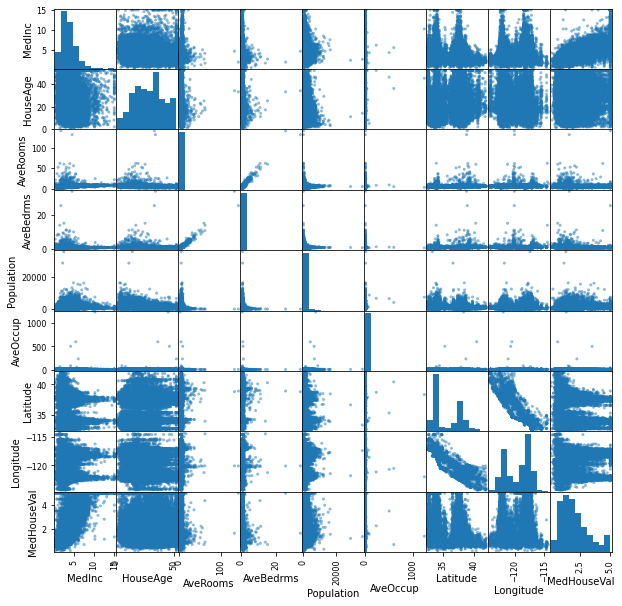

In [7]:
df_california_housing["MedHouseVal"] = dataset_california_housing['target']
pd.plotting.scatter_matrix(df_california_housing, figsize = (10,10))

### 6. Plotting only 1% of the samples to get a clearer view of the data trend. We can see that AveBedrms feature has little affect on MedHouseVal, since the trend has very low slopes (either horizontal or vertical), which explains the low R^2 score found in #4. 

### 7. The feature with the strongest linear relationship with MedHouseVal would be MedInc, since we can see some correlation with the two.

### 8. The relation between MedHouseVal and the Latitude and Longitude features show us that the coordinates with the largest clusters are located near the beaches.

array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

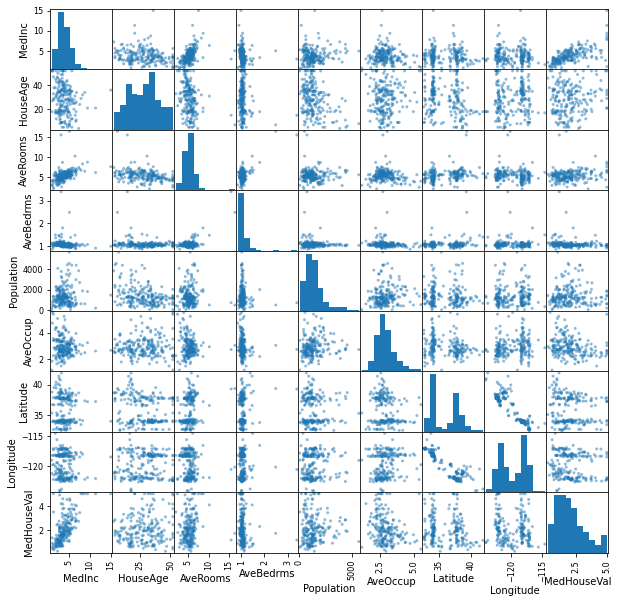

In [8]:
df_california_housing.sample(frac=0.01, random_state=2021-3-25)
pd.plotting.scatter_matrix(df_california_housing.sample(frac=0.01, random_state=2021-3-25)
                           , figsize = (10,10))
# as the average number of bedrooms go up, there is no effect on the general trend of MedHouseVal
# therefore R^2 is accurate
# MedHouseVal and MedInc seem the most linear
# 8. By examining the sample 1% plots, we can see that certain lats and longs have a higher population density but more importantly,
# at the very top of the "peaks" we can see some points have the highest MedHouseVal. Eyeballing it, by looking at Lat. 34 and 
# long. -121, those general areas are near the beaches. Lat 38 and long -122 indicate the same areas. In general, these coordinates
# show us that MedHouseVal is higher when near the beaches.

### 9. using corr() method from pandas to examine the correlation matrix. From this, we can see that the feature with the strongest predictor of MedHouseVal would be MedInc.

In [9]:
df_california_housing.corr(method='pearson', min_periods=1)
# we can see that MedInc and MedHouseVal have the highest corr value (closer to 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### 10. Repeating experiment 4 using MedInc instead of AveBedrms. The score here is higher compared to one found with AveBedrms.

In [10]:
medInc = X.iloc[:,0]
medInc_train = X_train.iloc[:,0]
medInc_test = X_test.iloc[:,0]
reg_medInc = LinearRegression().fit(medInc.values.reshape(-1, 1), y.values.reshape(-1, 1))
print(reg_medInc.score(medInc_train.values.reshape(-1,1), y_train.values.reshape(-1,1)))
print(reg_medInc.score(medInc_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))
# creating a new model using MedInc instead of AveBedrms, we can see that the score is higher
# than using AveBedrms

0.468028593998157
0.4951330274250023


### 11(fixed). Training and test MSE's compared to experiment 3 are lower.

In [11]:
MSE_medInc8_train = mean_squared_error(y_train.values.reshape(-1,1), reg_medInc.predict(medInc_train.values.reshape(-1,1)))
print("Train MSE:" + str(MSE_medInc8_train))
MSE_medInc8_test = mean_squared_error(y_test.values.reshape(-1,1), reg_medInc.predict(medInc_test.values.reshape(-1,1)))
print("Test MSE: " + str(MSE_medInc8_test))

Train MSE:0.7084156047875041
Test MSE: 0.6719933323147469


### 12. Creating a degree-2 polynomial and interaction terms for the entire 8 set of features and fitting a new linear model. No overfitting seems to be present as MSE for training and test set are roughly close to each other.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
X = df_california_housing.drop('MedHouseVal', 1)
X_degree2 = PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X)
X_train_deg2 = np.array(PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X_train))
X_test_deg2 = np.array(PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X_test))
X_deg2_arr = np.array(X_degree2)
deg2_model = LinearRegression().fit(X_deg2_arr, np.array(y))
print("train MSE: " + str(mean_squared_error(y_train, deg2_model.predict(X_train_deg2))))
print("test MSE: " + str(mean_squared_error(y_test, deg2_model.predict(X_test_deg2))))

train MSE: 0.45252944417892405
test MSE: 0.4281613901947884


### 13. Using L2-Regularization with alpha = 1.0 and fitting the model to the degree-2 polynomial features. The MSE compared to the previous model is higher. However, the score is slightly lower, which indicate a lower reliability. This may be due to L2-Regularization penalizing large values for the coefficients.

In [13]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, normalize = True)
ridge_fit = clf.fit(X_deg2_arr, y)
print("train MSE: " + str(mean_squared_error(y_train, ridge_fit.predict(X_train_deg2))))
print("test MSE: " + str(mean_squared_error(y_test, ridge_fit.predict(X_test_deg2))))
print("train score: " + str(ridge_fit.score(X_train_deg2, y_train)))
print("test score: " + str(ridge_fit.score(X_test_deg2, y_test)))
print("previous model train score: " + str(deg2_model.score(X_train_deg2, y_train)))
print("previous model test score: " + str(deg2_model.score(X_test_deg2, y_test)))

train MSE: 0.6582261284778643
test MSE: 0.624653440215336
train score: 0.5057174394985945
test score: 0.5306993743765851
previous model train score: 0.6601815049665587
previous model test score: 0.67832337845296
